In [8]:
import pandas as pd
import matplotlib.pyplot as pt
import functools
import os

DATA_DIR = "D:\\Netology\\python\\4.2\\names\\"

Данные для пунктов 1, 2. На вход - список имен, шаг лет.
1. количество имен Ruth и Robert с 1900 по 2000
2. количество имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000)

In [16]:
def name_dynamic(names, step):
    file_list = [{'file': f'{DATA_DIR}yob{str(year)}.txt', 'year': year} for year in range(1900, 2001, step)]
    list_ = []
    for file in file_list:
        if not os.path.exists(file['file']):
            continue
        data = pd.read_csv(file['file'], names=['Name', 'Gender', 'Count'])
        data = data[data['Name'].isin(names)]
        data['Year'] = file['year']
        list_.append(data)
    all_stat = pd.concat(list_).sort_values(by='Year', ascending=True).groupby(['Name','Year']).sum()
    return all_stat


d_frame1 = name_dynamic(['Ruth', 'Robert'], 1)
d_frame2 = name_dynamic(['Ruth', 'Robert'], 5)
d_frame1
d_frame2

Count
Name   Year       
Robert 1900   3845
       1905   3431
       1910   5638
       1915  28854
       1920  48883
       1925  61246
       1930  62572
       1935  56755
       1940  61401
       1945  70132
       1950  83768
       1955  83953
       1960  72640
       1965  63389
       1970  57529
       1975  35579
       1980  34535
       1985  32326
       1990  28980
       1995  18627
       2000  13760
Ruth   1900   4781
       1905   5088
       1910   7247
       1915  21924
       1920  26155
       1925  22325
       1930  15010
       1935  10041
       1940   8922
       1945   8063
       1950   7138
       1955   6200
       1960   4960
       1965   3242
       1970   1828
       1975   1235
       1980   1262
       1985   1125
       1990    913
       1995    858
       2000    903

Данные для пункта 3: 
3. количество употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год

In [84]:
def top_letter(letter, year):
    file = f'{DATA_DIR}yob{year}.txt'
    if not os.path.exists(file):
        return
    data = pd.read_csv(file, names=['Name', 'Gender', 'Count'])
    data = data[data.Name.str.startswith(letter)].groupby(['Name', 'Gender']).sum().sort_values(by='Count', ascending=False).head(10)
    return data


d_frame3 = top_letter('R', 1950)
d_frame3

,,Count
Name,Gender,
Robert,M,83565
Richard,M,51001
Ronald,M,29916
Roger,M,12548
Raymond,M,11179
Rebecca,F,9427
Ruth,F,7128
Roy,M,6456
Rita,F,6424


Данные для пункта 4: 
4. Возвращает датасет имя, количество, количество согласных в имени

In [13]:
def is_consonant(sum, letter):
    cont = ['b', 'c', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'w', 'x', 'y', 'z']
    if letter.lower() in cont:
        sum = sum + 1
    return sum


def count_consonant(word):
    count = functools.reduce(is_consonant, word, 0)
    return count


def stat_consonant(step):
    file_list = [{'file': f'{DATA_DIR}yob{str(year)}.txt', 'year': year} for year in range(1900, 2001, step)]
    list_ = []
    for file in file_list:
        if not os.path.exists(file['file']):
            continue
        data = pd.read_csv(file['file'], names=['Name', 'Gender', 'Count'])
        list_.append(data)
    all_stat = pd.concat(list_).groupby(['Name']).sum().reset_index()
    all_stat['Consonant'] = all_stat.apply(lambda row: count_consonant(row.Name), axis=1)
    return all_stat


d_frame4 = stat_consonant(1)
d_frame4

,Name,Count,Consonant
0,Aadam,58,2
1,Aadarsh,5,4
2,Aadil,80,2
3,Aaditya,30,3
4,Aage,7,1
5,Aagot,5,2
6,Aahil,6,2
7,Aailiyah,5,3
8,Aailyah,36,3
9,Aaisha,83,2


Собственно, сами графики:

In [12]:
%matplotlib inline

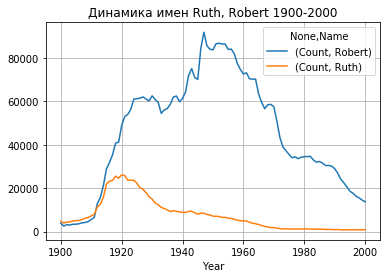

In [73]:
d_frame1.unstack('Name').plot(title='Динамика имен Ruth, Robert 1900-2000', grid=True)


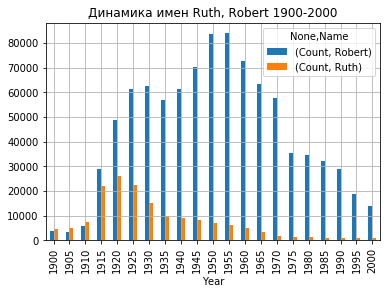

In [72]:
d_frame2.unstack('Name').plot(kind='bar', title='Динамика имен Ruth, Robert 1900-2000', grid=True)


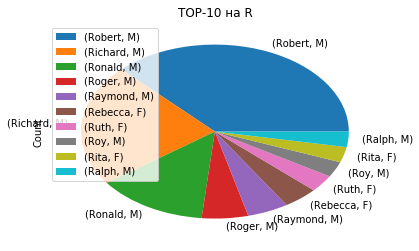

In [97]:
d_frame3.reset_index('Gender').drop('Gender', axis=1)
d_frame3.plot.pie(y='Count',title='TOP-10 на R')

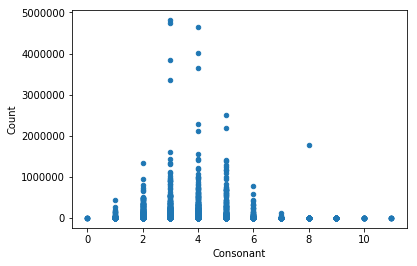

In [98]:
d_frame4.plot.scatter(x='Consonant', y='Count')